In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.ensemble import RandomForestRegressor
combi = pd.read_table('Historical_combi2.csv',delimiter =';')

combi=combi.fillna(0)


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn import linear_model
import statsmodels.api as sm

In [ ]:
# Ask for input
query =input()


In [ ]:
query_s = query.split(',')

In [25]:
plotx =input()


Dated Brent


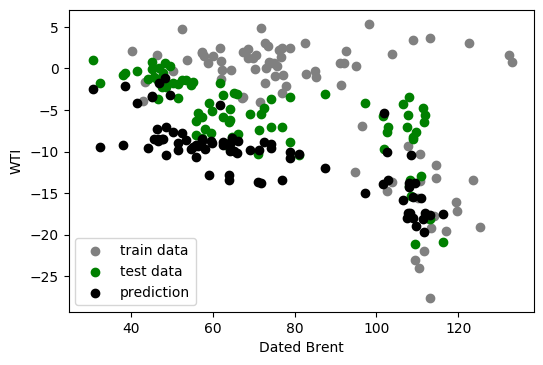

Mean squared error: 2.13
Feature ranking:
Feature Bonny light (0.008940)
Feature Butane (0.133769)
Feature Dated Brent (0.172372)
Feature Dubai (0.007477)
Feature ESPO (0.017846)
Feature FO 0.5% (0.000000)
Feature FO 1% (0.008239)
Feature FO 3.5% (0.007613)
Feature Gasoil (0.011360)
Feature Gasoline (0.017297)
Feature Jet (0.028534)
Feature LLS (0.312687)
Feature Mars (0.011032)
Feature Maya Europe (0.004996)
Feature Maya USGC (0.012211)
Feature Naphtha (0.019590)
Feature Propane (0.021264)
Feature ULSD (0.017123)
Feature Urals MED (0.001265)
Feature Urals NWE (0.002167)
Feature VGO 0.5% (0.110396)
Feature VGO 2% (0.073819)


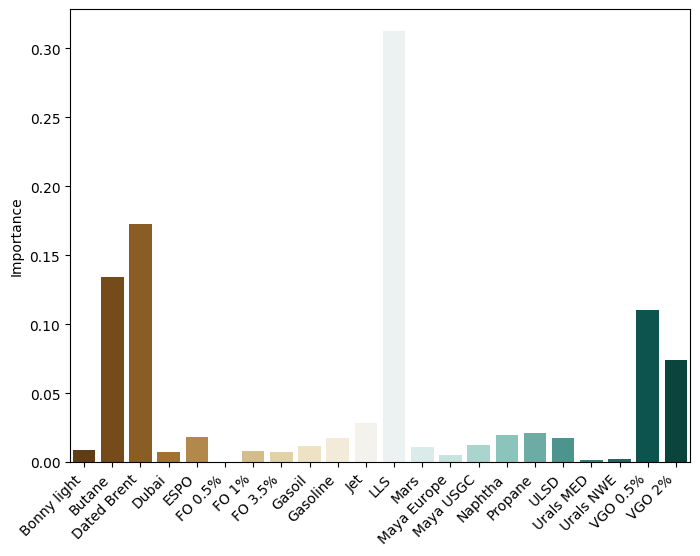

In [26]:
s = combi[query]
ss = s.iloc[s.to_numpy().nonzero()[0]]
ss.first_valid_index()

half = int((236 -ss.first_valid_index())/2)

train_combi = combi.iloc[ss.first_valid_index():ss.first_valid_index()+half,1:]
test_combi = combi.iloc[ss.first_valid_index()+half+1:,1:]

plt.rcParams['figure.dpi'] = 100

x_train=train_combi[train_combi.columns.difference([query])]
y_train=train_combi[query]

#df.drop('b', axis=1)


x_test=test_combi[test_combi.columns.difference([query])]
y_test=test_combi[query].to_frame()

regressor = RandomForestRegressor(n_estimators=200, max_depth=5)

clf=regressor.fit(x_train, y_train)

y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred)


plt_train=plt.scatter(x_train[plotx],y_train,   color='grey')
plt_test=plt.scatter(x_test[plotx],y_test,   color='green')
plt_pred=plt.scatter(x_test[plotx], y_pred,  color='black')

plt.xlabel(plotx)
plt.ylabel(query)
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()

print("Mean squared error: %.2f"
      % np.mean((regressor.predict(x_train) - y_train) ** 2))

import seaborn as sns
importances=regressor.feature_importances_

indices=list(x_train)
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("Feature %s (%f)" % (indices[f], importances[f]))

f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.barplot(indices, importances, palette="BrBG", ax=ax1)
ax1.set_ylabel("Importance")

ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);